<a href="https://colab.research.google.com/github/jaewonlee16/torch_tutorial/blob/master/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import numpy as np

import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

import matplotlib.pyplot as plt
import random

In [17]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print ('current device: ', device)


current device:  cuda


In [89]:
training_epochs = 6
batch_size = 100

In [90]:
# MNIST dataset
mnist_train = dsets.MNIST(root='MNIST_data/',
                          train=True,
                          transform=transforms.ToTensor(),
                          download=True)

mnist_test = dsets.MNIST(root='MNIST_data/',
                         train=False,
                         transform=transforms.ToTensor(),
                         download=True)


In [91]:
dataloader = DataLoader(dataset = mnist_train, batch_size=batch_size, shuffle=True, drop_last = True)

In [92]:
linear = nn.Linear(784, 10).to(device)

linear2 = nn.Sequential(
    nn.Linear(784, 100),
    nn.ReLU(),
    nn.Linear(100, 100),
    nn.ReLU(),
    nn.Linear(100, 10)
).to(device)

In [93]:
model = linear2
criterion = nn.CrossEntropyLoss().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-2)

In [94]:
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = len(dataloader)
    for X, Y in dataloader:
        # 배치 크기가 100이므로 아래의 연산에서 X는 (100, 784)의 텐서가 된다.
        X = X.view(-1, 28 * 28).to(device)
        # 레이블은 원-핫 인코딩이 된 상태가 아니라 0 ~ 9의 정수.
        Y = Y.to(device)

        optimizer.zero_grad()
        hypothesis = model(X)
        cost = criterion(hypothesis, Y)
        cost.backward()
        optimizer.step()

        avg_cost += cost / total_batch

    print('Epoch:', '%04d' % (epoch + 1), '/', training_epochs, 'cost =', '{:.9f}'.format(avg_cost))

print('Learning finished')

Epoch: 0001 / 6 cost = 0.244806498
Epoch: 0002 / 6 cost = 0.130893633
Epoch: 0003 / 6 cost = 0.111721784
Epoch: 0004 / 6 cost = 0.102631949
Epoch: 0005 / 6 cost = 0.090270132
Epoch: 0006 / 6 cost = 0.082143217
Learning finished


Accuracy: 0.967199981212616
Label:  9
Prediction:  9


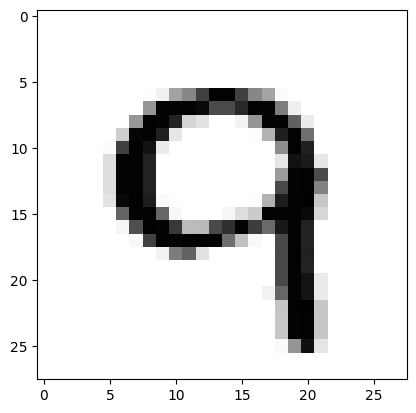

In [125]:
# 테스트 데이터를 사용하여 모델을 테스트한다.
with torch.no_grad(): # torch.no_grad()를 하면 gradient 계산을 수행하지 않는다.
    X_test = mnist_test.test_data.view(-1, 28 * 28).float().to(device)
    Y_test = mnist_test.test_labels.to(device)

    prediction = model(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test
    accuracy = correct_prediction.float().mean()
    print('Accuracy:', accuracy.item())

    # MNIST 테스트 데이터에서 무작위로 하나를 뽑아서 예측을 해본다
    r = random.randint(0, len(mnist_test) - 1)
    X_single_data = mnist_test.test_data[r:r + 1].view(-1, 28 * 28).float().to(device)
    Y_single_data = mnist_test.test_labels[r:r + 1].to(device)

    print('Label: ', Y_single_data.item())
    single_prediction = model(X_single_data)
    print('Prediction: ', torch.argmax(single_prediction, 1).item())

    plt.imshow(mnist_test.test_data[r:r + 1].view(28, 28), cmap='Greys', interpolation='nearest')
    plt.show()